# I.1. Centrality measures:

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

G = nx.read_graphml('london.graph.xml')

In [2]:
type(G)

networkx.classes.graph.Graph

In [3]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [4]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [5]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [6]:
for x in list(G.nodes().keys()):
    G.nodes[x]['station_name'] = x

In [7]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

In [8]:
#nod_name1 = {(e1):(G.nodes[e1]) for e1 in G.nodes()}

In [9]:
list(G.nodes(data = True))[0]

('Wembley Park',
 {'coords': (519316.5590174915, 186389.32981656672),
  'station_name': 'Wembley Park'})

In [10]:
# we can also add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}


nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

In [11]:
# nod_name1

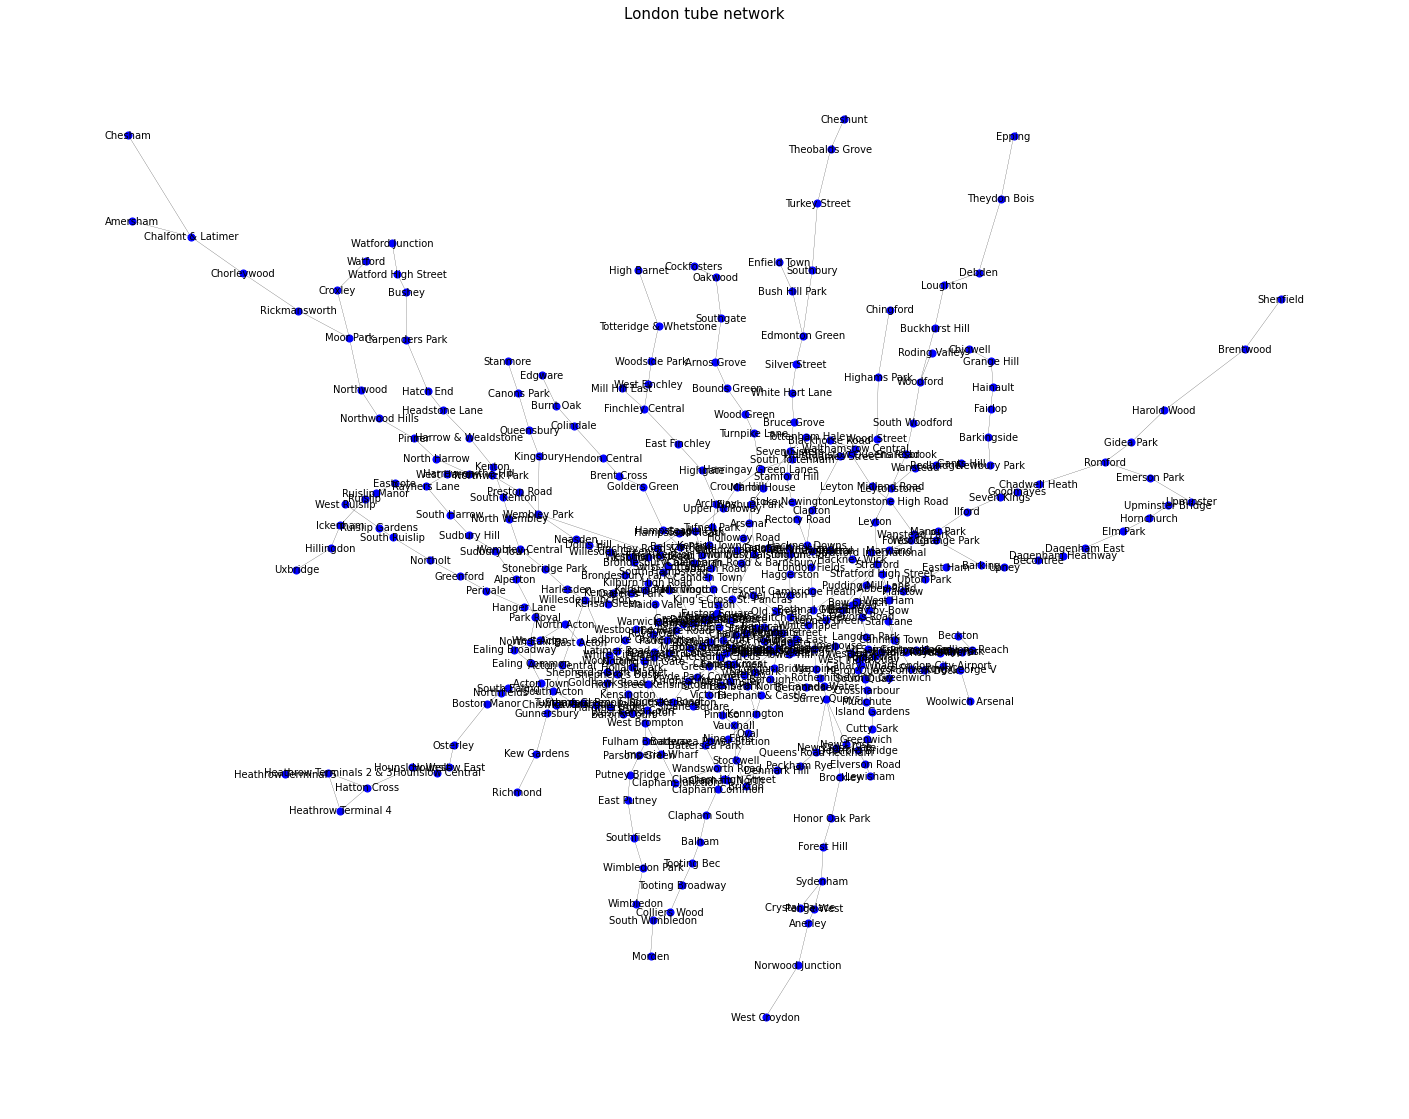

In [12]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [13]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,length,station_1_,station_2_,flows,line_name
0,Wembley Park,Kingsbury,2916.771558,Wembley Park,Kingsbury,12356,Jubilee
1,Wembley Park,Neasden,2353.165938,Wembley Park,Neasden,6744,Jubilee
2,Wembley Park,Preston Road,1419.735166,Wembley Park,Preston Road,36601,Metropolitan
3,Wembley Park,Finchley Road,7266.373927,Wembley Park,Finchley Road,55216,Metropolitan
4,Kingsbury,Queensbury,1245.995234,Kingsbury,Queensbury,9419,Jubilee
5,Queensbury,Canons Park,1693.307343,Queensbury,Canons Park,6385,Jubilee
6,Canons Park,Stanmore,1419.669476,Canons Park,Stanmore,3624,Jubilee
7,Stratford,West Ham,1673.509515,Stratford,West Ham,91801,Jubilee
8,Stratford,Mile End,2805.001392,Stratford,Mile End,12010,Central
9,Stratford,Leyton,2131.342926,Stratford,Leyton,56082,Central


In [14]:
#if want to know what is the maximum distance between stations
max_dist=max({weight for e1, e2, weight in G.edges(data='length')})
max_dist
#This distance in given in meters

7266.37392749648

In [15]:
#if want to know the edge connecting the stations farther away from each other
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('Wembley Park', 'Finchley Road'),
 {'length': 7266.37392749648,
  'line_name': 'Metropolitan',
  'flows': 55216,
  'station_1_': 'Wembley Park',
  'station_2_': 'Finchley Road'})

In [16]:
#if want to know the name of stations which are further away from each other
furthest_stat = [(d['station_1_'],d['station_2_']) for  u,v,d in G.edges(data=True) if d['length'] == max_dist]
furthest_stat

[('Wembley Park', 'Finchley Road')]

In [17]:
#if want to know to which stations Baker Street is directly connected to

Baker_Street = [(d['station_1_'],d['station_2_']) for  u,v,d in G.edges(data=True) if d['station_1_'] == 'Baker Street'or d['station_2_'] == 'Baker Street']
Baker_Street

[('Bond Street', 'Baker Street'),
 ('Baker Street', "St. John's Wood"),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Edgware Road'),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park")]

In [18]:
#if want to know to which stations Baker Street is directly connected to but we don't know if is written with the space 

Baker = [(d['station_1_'],d['station_2_']) for  u,v,d in G.edges(data=True) if "Baker" in d['station_1_'] or "Baker" in d['station_2_']]
Baker

[('Bond Street', 'Baker Street'),
 ('Baker Street', "St. John's Wood"),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Edgware Road'),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park")]

In [19]:
#if want to know the edges connecting Baker Street station:

Baker = [(u,v,d) for  u,v,d in G.edges(data=True) if "Baker" in d['station_1_'] or "Baker" in d['station_2_']]
Baker

[('Bond Street',
  'Baker Street',
  {'length': 1744.2782307078057,
   'line_name': 'Jubilee',
   'flows': 112517,
   'station_1_': 'Bond Street',
   'station_2_': 'Baker Street'}),
 ('Baker Street',
  "St. John's Wood",
  {'length': 2138.930092928529,
   'line_name': 'Jubilee',
   'flows': 10477,
   'station_1_': 'Baker Street',
   'station_2_': "St. John's Wood"}),
 ('Baker Street',
  'Great Portland Street',
  {'length': 826.8194453063362,
   'line_name': 'Hammersmith & City',
   'flows': 48306,
   'station_1_': 'Baker Street',
   'station_2_': 'Great Portland Street'}),
 ('Baker Street',
  'Edgware Road',
  {'length': 1034.840367463597,
   'line_name': 'Hammersmith & City',
   'flows': 63428,
   'station_1_': 'Baker Street',
   'station_2_': 'Edgware Road'}),
 ('Baker Street',
  'Finchley Road',
  {'length': 3534.6372473145702,
   'line_name': 'Metropolitan',
   'flows': 71854,
   'station_1_': 'Baker Street',
   'station_2_': 'Finchley Road'}),
 ('Baker Street',
  'Marylebone',
  

In [20]:
# diameter of the network
# [('Wembley Park' 到 'Finchley Road') 的 最短距离？？？]
nx.diameter(G)

36

In [21]:
SP_o=nx.average_shortest_path_length(G)
SP_o

13.545997506234414

In [22]:
clus_coo = nx.average_clustering(G)
clus_coo

0.030382377389858693

In [23]:
# diameter of the network considering the distance between stations (weighted diameter)

nlen = {n:nx.single_source_dijkstra_path_length(G, n, weight='length') for n in G.nodes() }
e = nx.eccentricity(G,sp=nlen)
d = nx.diameter(G, e)
d

78581.28589029584

## Measure
### Degree Centrality on nodes:

In [24]:
#  We can calculate the degree centrality using networkx function:
# 度中心性（Degree Centrality）是在网络分析中刻画节点中心性（Centrality）的最直接度量指标。一个节点的节点度越大就意味着这个节点的度中心性越高，该节点在网络中就越重要。
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [25]:
# To dataframe using the nodes as the index
# 为什么这个degree是小数？？？？
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


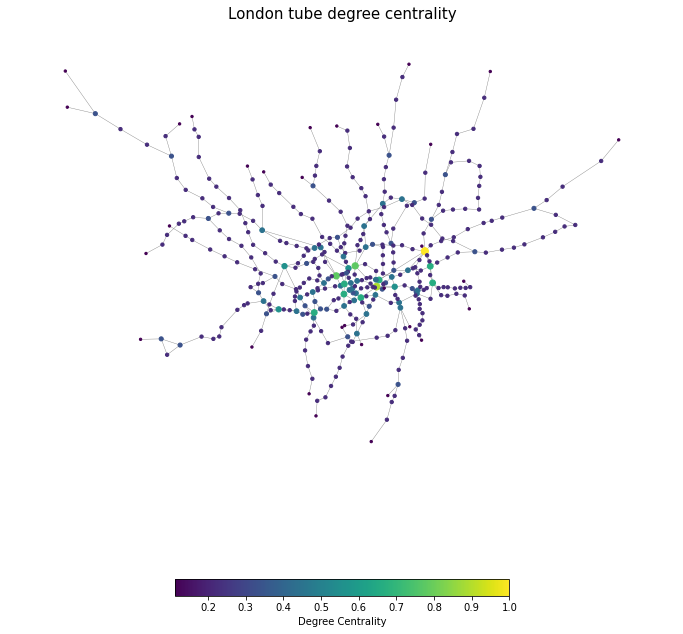

In [26]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]


#normalizing the value for visualization
deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

### eigen vector

In [27]:
bet_london_w=nx.eigenvector_centrality_numpy(G, weight='length')

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'eigen')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['eigen'] = pd.Series(nx.get_node_attributes(G, 'eigen'))

df_sorted = df.sort_values(["eigen"], ascending=False)
df_sorted[0:10]

,station_name,eigen
Wembley Park,Wembley Park,0.640165
Finchley Road,Finchley Road,0.635999
Baker Street,Baker Street,0.287357
Kingsbury,Kingsbury,0.210941
Neasden,Neasden,0.168128
Preston Road,Preston Road,0.104588
St. John's Wood,St. John's Wood,0.073798
Bond Street,Bond Street,0.057429
West Hampstead,West Hampstead,0.054723
Swiss Cottage,Swiss Cottage,0.053379


### Betweenness Centrality on nodes:

In [28]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the distance between stations:
#介数中心性（英语：Betweenness Centrality）是基于最短路径针对网络图中心性的衡量标准之一。针对全连接网络图，其中任意两个节点均至少存在一个最短路径，
#在无权重网络图中该最短路径是路径包含边的数量求和，加权网络图中该最短路径则是路径包含边的权重求和。每个节点的介数中心性即为这些最短路径穿过该节点的次数。
# 为什么不用weight而是用length? 为什么不inverse？
## 因为这是关于distance，time也不需要 inverse

bet_london_w=nx.betweenness_centrality(G,weight='length',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

In [29]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w
Bank and Monument,Bank and Monument,17656.0
King's Cross St. Pancras,King's Cross St. Pancras,16693.0
Stratford,Stratford,14548.0
Oxford Circus,Oxford Circus,13561.0
Euston,Euston,13240.0
Baker Street,Baker Street,12150.0
Earl's Court,Earl's Court,11475.0
Shadwell,Shadwell,11128.0
Waterloo,Waterloo,10408.0
South Kensington,South Kensington,10335.0


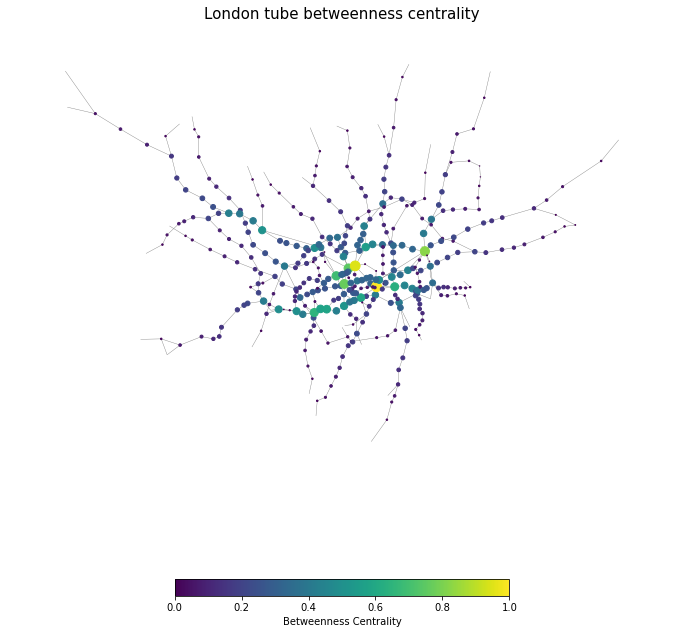

In [30]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()

In [31]:
### Topological betweenness centrality:
## 当不在意distance 在两个站点，就可以ignore distance用topological - 只在意两个node之间有多少个stop。

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


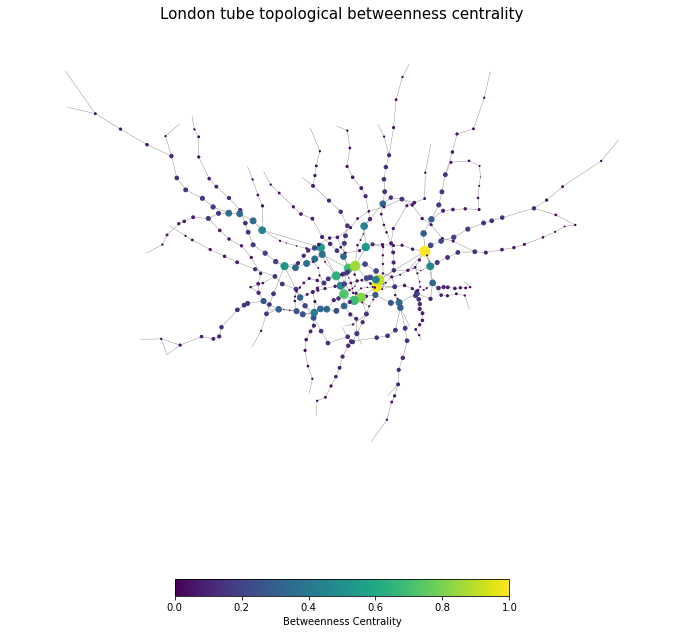

In [32]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

#### Closeness Centrality:

In [33]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G, distance='length')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

,station_name,closeness_w
Holborn,Holborn,0.000079
King's Cross St. Pancras,King's Cross St. Pancras,0.000079
Tottenham Court Road,Tottenham Court Road,0.000079
Oxford Circus,Oxford Circus,0.000079
Leicester Square,Leicester Square,0.000078
Piccadilly Circus,Piccadilly Circus,0.000078
Charing Cross,Charing Cross,0.000078
Chancery Lane,Chancery Lane,0.000078
Covent Garden,Covent Garden,0.000078
Embankment,Embankment,0.000078


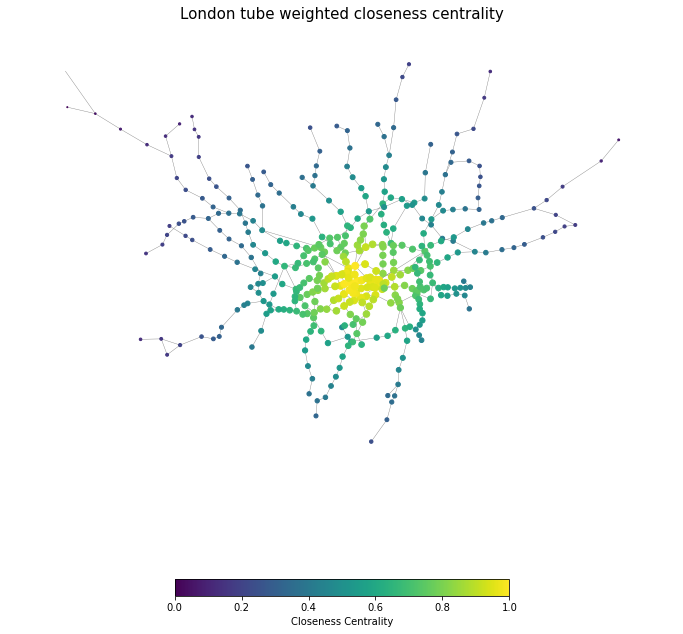

In [34]:
# Lets set color and width of nodes according to the closeness values

clos_w_val=[(i[1]['closeness_w']) for i in G.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in G.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted closeness centrality",fontsize=15)
plt.show()

In [35]:
#topological closeness centrality
# 和上面的比没有用 distance, 可以用这个 也可以用有distance的，在做作业的时候需要说明为什么选择其中的一个。
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


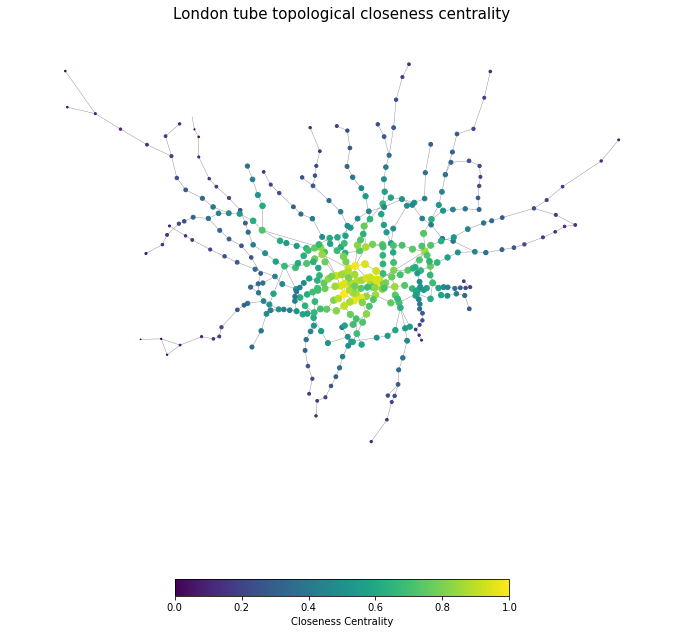

In [36]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

In [37]:
# number of connected components
nx.number_connected_components(G)

1

# I.3. Impact measures:

### a) non-sequential removal

In [38]:
from networkx.algorithms.efficiency_measures import global_efficiency

In [39]:
GA=G.copy()
GA1=G.copy()
GA2=G.copy()

#### Degree Centrality

In [40]:
#To remove nodes: 
#If we want to remove the node with the max value of betweenness centrality:

maxde=[n for n in GA.nodes() if GA.nodes[n]['degree'] == max(degree_values)]
maxde

['Stratford']

In [41]:
# To check that node:
GA.nodes[(", ".join(maxde))]['station_name']

#G2.nodes['940GZZLUBST']['station_name']

'Stratford'

In [42]:
# Number of existing nodes:
l1=list(GA.nodes)
len(l1)

401

In [43]:
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA.remove_nodes_from(maxde)

In [44]:
# number of nodes after the removal
l2=list(GA.nodes)
len(l2)

400

In [45]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(l2))
rem_nodes

['Stratford']

In [46]:
# Has the graph one component?
print(nx.is_connected(GA))

False


In [47]:
# number of connected components
nx.number_connected_components(GA)

3

In [48]:
# To comput the size ( number of node) of each component
Subg = [GA.subgraph(c).copy() for c in nx.connected_components(GA)]
[len(subgraph.nodes) for subgraph in Subg]

[379, 20, 1]

In [49]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GA)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA.subgraph(largest_component)

In [50]:
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

379

In [51]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

49

In [52]:
clus_GA = nx.average_clustering(GA)
clus_GA

0.030625000000000003

In [53]:
for C in (GA.subgraph(c).copy() for c in nx.connected_components(GA)):
    print(nx.average_shortest_path_length(C))

14.496447069006436
4.821052631578947
0


In [54]:
SP_GA=nx.average_shortest_path_length(Largest_subgraph)
SP_GA

14.496447069006436

In [55]:
g_e = nx.global_efficiency(GA)
g_e

0.08891736066510689

In [56]:
maxde2 = ['Bank and Monument']
maxde2

['Bank and Monument']

In [57]:
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA.remove_nodes_from(maxde2)

In [58]:
# Number of existing nodes:
l3=list(GA.nodes)
len(l3)

399

In [59]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(l3))
rem_nodes

['Bank and Monument', 'Stratford']

In [60]:
# Has the graph one component?
print(nx.is_connected(GA))

False


In [61]:
# number of connected components
nx.number_connected_components(GA)

3

In [62]:
# To comput the size ( number of node) of each component
Subg = [GA.subgraph(c).copy() for c in nx.connected_components(GA)]
[len(subgraph.nodes) for subgraph in Subg]

[378, 20, 1]

In [63]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GA)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA.subgraph(largest_component)

In [64]:
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

378

In [65]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

49

In [66]:
clus_coe =nx.average_clustering(GA)
SP_GA=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA))

cluster coefficent: 0.030027449576321755
shortest path ave: 14.872496596634528


In [67]:
maxde3 = ["King's Cross St. Pancras"]
maxde3

["King's Cross St. Pancras"]

In [68]:
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA.remove_nodes_from(maxde3)

In [69]:
# Number of existing nodes:
l4=list(GA.nodes)
len(l4)

398

In [70]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(l4))
rem_nodes

['Bank and Monument', 'Stratford', "King's Cross St. Pancras"]

In [71]:
# Has the graph one component?
print(nx.is_connected(GA))

False


In [72]:
# number of connected components
nx.number_connected_components(GA)

3

In [73]:
# To comput the size ( number of node) of each component
Subg = [GA.subgraph(c).copy() for c in nx.connected_components(GA)]
[len(subgraph.nodes) for subgraph in Subg]

[377, 20, 1]

In [74]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GA)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA.subgraph(largest_component)

In [75]:
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

377

In [76]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

49

In [77]:
clus_coe =nx.average_clustering(GA)
SP_GA=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA))

cluster coefficent: 0.030270399617133285
shortest path ave: 16.054926914611436


In [78]:
maxde4 = ['Baker Street']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA.remove_nodes_from(maxde4)

In [79]:
# Number of existing nodes:
l5=list(GA.nodes)
len(l5)

397

In [80]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(l5))
rem_nodes

['Bank and Monument', 'Baker Street', 'Stratford', "King's Cross St. Pancras"]

In [81]:
print(nx.is_connected(GA))

False


In [82]:
# number of connected components
nx.number_connected_components(GA)

4

In [83]:
# To comput the size ( number of node) of each component
Subg = [GA.subgraph(c).copy() for c in nx.connected_components(GA)]
[len(subgraph.nodes) for subgraph in Subg]

[374, 20, 2, 1]

In [84]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GA)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA.subgraph(largest_component)

In [85]:
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

374

In [86]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

49

In [87]:
clus_coe =nx.average_clustering(GA)
SP_GA=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA))

cluster coefficent: 0.027287993282955506
shortest path ave: 17.013376152313228


In [88]:
maxde5 = ["Earl's Court"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA.remove_nodes_from(maxde5)

In [89]:
# Number of existing nodes:
l6=list(GA.nodes)
len(l6)

396

In [90]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(l6))
rem_nodes

["King's Cross St. Pancras",
 'Stratford',
 "Earl's Court",
 'Bank and Monument',
 'Baker Street']

In [91]:
print(nx.is_connected(GA))

False


In [92]:
# number of connected components
nx.number_connected_components(GA)

4

In [93]:
# To comput the size ( number of node) of each component
Subg = [GA.subgraph(c).copy() for c in nx.connected_components(GA)]
[len(subgraph.nodes) for subgraph in Subg]

[373, 20, 2, 1]

In [94]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GA)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA.subgraph(largest_component)

In [95]:
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

373

In [96]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

50

In [97]:
clus_coe =nx.average_clustering(GA)
SP_GA = nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA))

cluster coefficent: 0.020538720538720537
shortest path ave: 17.37589725849693


In [98]:
maxde6 = ['Oxford Circus']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA.remove_nodes_from(maxde6)

In [99]:
# Number of existing nodes:
l7=list(GA.nodes)
len(l7)

395

In [100]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(l7))
rem_nodes

["King's Cross St. Pancras",
 'Oxford Circus',
 'Stratford',
 "Earl's Court",
 'Bank and Monument',
 'Baker Street']

In [101]:
print(nx.is_connected(GA))

False


In [102]:
# number of connected components
nx.number_connected_components(GA)

5

In [103]:
# To comput the size ( number of node) of each component
Subg = [GA.subgraph(c).copy() for c in nx.connected_components(GA)]
[len(subgraph.nodes) for subgraph in Subg]

[371, 20, 2, 1, 1]

In [104]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GA)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

371

In [105]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

50

In [106]:
clus_coe =nx.average_clustering(GA)
SP_GA=nx.average_shortest_path_length(Largest_subgraph)
print("clustering coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA))

clustering coefficent: 0.019071729957805903
shortest path ave: 17.557150142055804


In [107]:
maxde7 = ['Liverpool Street']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA.remove_nodes_from(maxde7)

In [108]:
# Number of existing nodes:
l8=list(GA.nodes)
len(l8)

394

In [109]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(l8))
rem_nodes

["King's Cross St. Pancras",
 'Oxford Circus',
 'Liverpool Street',
 'Stratford',
 "Earl's Court",
 'Bank and Monument',
 'Baker Street']

In [110]:
print(nx.is_connected(GA))

False


In [111]:
# number of connected components
nx.number_connected_components(GA)

6

In [112]:
# To comput the size ( number of node) of each component
Subg = [GA.subgraph(c).copy() for c in nx.connected_components(GA)]
[len(subgraph.nodes) for subgraph in Subg]

[365, 20, 2, 5, 1, 1]

In [113]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GA)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

365

In [114]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

50

In [115]:
clus_coe =nx.average_clustering(GA)
SP_GA=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) +  "\n" + "shortest path ave: " + str(SP_GA))

cluster coefficent: 0.019120135363790182
shortest path ave: 17.56239650760199


In [116]:
maxde8 = ['Waterloo']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA.remove_nodes_from(maxde8)

In [117]:
# Number of existing nodes:
l9=list(GA.nodes)
len(l9)

393

In [118]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(l9))
rem_nodes

["King's Cross St. Pancras",
 'Oxford Circus',
 'Waterloo',
 'Liverpool Street',
 'Stratford',
 "Earl's Court",
 'Bank and Monument',
 'Baker Street']

In [119]:
print(nx.is_connected(GA))

False


In [120]:
# number of connected components
nx.number_connected_components(GA)

6

In [121]:
# To comput the size ( number of node) of each component
Subg = [GA.subgraph(c).copy() for c in nx.connected_components(GA)]
[len(subgraph.nodes) for subgraph in Subg]

[364, 20, 2, 5, 1, 1]

In [122]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GA)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

364

In [123]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

51

In [124]:
clus_coe =nx.average_clustering(GA)
SP_GA=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA))

cluster coefficent: 0.018066157760814248
shortest path ave: 18.185420639966093


In [125]:
maxde9 = ['Green Park']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA.remove_nodes_from(maxde9)

In [126]:
# Number of existing nodes:
l10=list(GA.nodes)
len(l10)

392

In [127]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(l10))
rem_nodes

["King's Cross St. Pancras",
 'Oxford Circus',
 'Waterloo',
 'Liverpool Street',
 'Stratford',
 "Earl's Court",
 'Bank and Monument',
 'Green Park',
 'Baker Street']

In [128]:
# number of connected components
nx.number_connected_components(GA)

6

In [129]:
# To comput the size ( number of node) of each component
Subg = [GA.subgraph(c).copy() for c in nx.connected_components(GA)]
[len(subgraph.nodes) for subgraph in Subg]

[363, 20, 2, 5, 1, 1]

In [130]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GA)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

363

In [131]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

51

In [132]:
clus_coe =nx.average_clustering(GA)
SP_GA=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA))

cluster coefficent: 0.019812925170068028
shortest path ave: 18.324779690425096


In [133]:
maxde10 = ['Canning Town']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA.remove_nodes_from(maxde10)

In [134]:
# Number of existing nodes:
l11=list(GA.nodes)
len(l11)

391

In [135]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(l11))
rem_nodes

["King's Cross St. Pancras",
 'Oxford Circus',
 'Canning Town',
 'Waterloo',
 'Liverpool Street',
 'Stratford',
 "Earl's Court",
 'Bank and Monument',
 'Green Park',
 'Baker Street']

In [136]:
# number of connected components
nx.number_connected_components(GA)


8

In [137]:
# To comput the size ( number of node) of each component
Subg = [GA.subgraph(c).copy() for c in nx.connected_components(GA)]
[len(subgraph.nodes) for subgraph in Subg]

[349, 20, 2, 5, 8, 1, 5, 1]

In [138]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GA)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

349

In [139]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

51

In [140]:
clus_coe =nx.average_clustering(GA)
SP_GA=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA))

cluster coefficent: 0.016879795396419435
shortest path ave: 18.570151170832922


#### Betweenness

In [141]:
#To remove nodes: 
#If we want to remove the node with the max value of Degree:

maxbet=[n for n in GA1.nodes() if GA1.nodes[n]['betweenness_t'] == max(betweenness_t_values)]
maxbet

['Stratford']

In [142]:
#maxbet = ['Waterloo']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA1.remove_nodes_from(maxbet)

In [143]:
# original 401 nodes
# Number of existing nodes:
bt1=list(GA1.nodes)
len(bt1)

400

In [144]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(bt1))
rem_nodes

['Stratford']

In [145]:
print(nx.is_connected(GA1))

False


In [146]:
# number of connected components
nx.number_connected_components(GA1)

3

In [147]:
# To comput the size ( number of node) of each component
Subg = [GA1.subgraph(c).copy() for c in nx.connected_components(GA1)]
[len(subgraph.nodes) for subgraph in Subg]

[379, 20, 1]

In [148]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GA1)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA1.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

379

In [149]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

49

In [150]:
clus_coe =nx.average_clustering(GA1)
SP_GA1=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA1))

cluster coefficent: 0.030625000000000003
shortest path ave: 14.496447069006436


In [151]:
maxbet1 = ['Bank and Monument']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA1.remove_nodes_from(maxbet1)

In [152]:
# original 401 nodes
# Number of existing nodes:
bt2=list(GA1.nodes)
len(bt2)

399

In [153]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(bt2))
rem_nodes

['Bank and Monument', 'Stratford']

In [154]:
# number of connected components
nx.number_connected_components(GA1)


3

In [155]:
# To comput the size ( number of node) of each component
Subg = [GA1.subgraph(c).copy() for c in nx.connected_components(GA1)]
[len(subgraph.nodes) for subgraph in Subg]

[378, 20, 1]

In [156]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GA1)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA1.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

378

In [157]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

49

In [158]:
clus_coe =nx.average_clustering(GA1)
SP_GA1=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA1))

cluster coefficent: 0.030027449576321755
shortest path ave: 14.872496596634528


In [159]:
maxbet2 = ['Liverpool Street']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA1.remove_nodes_from(maxbet2)

In [160]:
# original 401 nodes
# Number of existing nodes:
bt3=list(GA1.nodes)
len(bt3)

398

In [161]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(bt3))
rem_nodes

['Bank and Monument', 'Liverpool Street', 'Stratford']

In [162]:
# number of connected components
nx.number_connected_components(GA1)


3

In [163]:
# To comput the size ( number of node) of each component
Subg = [GA1.subgraph(c).copy() for c in nx.connected_components(GA1)]
[len(subgraph.nodes) for subgraph in Subg]

[377, 20, 1]

In [164]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GA1)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA1.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

377

In [165]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

49

In [166]:
clus_coe =nx.average_clustering(GA1)
SP_GA1=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA1))

cluster coefficent: 0.030102895429528594
shortest path ave: 15.03120943619843


In [167]:
maxbet3 = ["King's Cross St. Pancras"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA1.remove_nodes_from(maxbet3)

In [168]:
# original 401 nodes
# Number of existing nodes:
bt4=list(GA1.nodes)
len(bt4)

397

In [169]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(bt4))
rem_nodes

['Bank and Monument',
 'Liverpool Street',
 'Stratford',
 "King's Cross St. Pancras"]

In [170]:
# number of connected components
nx.number_connected_components(GA1)


4

In [171]:
# To comput the size ( number of node) of each component
Subg = [GA1.subgraph(c).copy() for c in nx.connected_components(GA1)]
[len(subgraph.nodes) for subgraph in Subg]

[371, 20, 5, 1]

In [172]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GA1)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA1.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

371

In [173]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

49

In [174]:
clus_coe =nx.average_clustering(GA1)
SP_GA1=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA1))

cluster coefficent: 0.03034664747511095
shortest path ave: 16.030742332629124


In [175]:
maxbet4 = ['Waterloo']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA1.remove_nodes_from(maxbet4)

In [176]:
# original 401 nodes
# Number of existing nodes:
bt5=list(GA1.nodes)
len(bt5)

396

In [177]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(bt5))
rem_nodes

["King's Cross St. Pancras",
 'Waterloo',
 'Liverpool Street',
 'Stratford',
 'Bank and Monument']

In [178]:
# number of connected components
nx.number_connected_components(GA1)


4

In [179]:
# To comput the size ( number of node) of each component
Subg = [GA1.subgraph(c).copy() for c in nx.connected_components(GA1)]
[len(subgraph.nodes) for subgraph in Subg]

[370, 20, 5, 1]

In [180]:

# Get the list of components:
components = nx.connected_components(GA1)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA1.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

370

In [181]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

49

In [182]:
clus_coe =nx.average_clustering(GA1)
SP_GA1=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA1))

cluster coefficent: 0.02932900432900433
shortest path ave: 16.75674210796162


In [183]:
maxbet5 = ['Green Park']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA1.remove_nodes_from(maxbet5)

In [184]:
# original 401 nodes
# Number of existing nodes:
bt6=list(GA1.nodes)
len(bt6)

395

In [185]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(bt6))
rem_nodes

["King's Cross St. Pancras",
 'Waterloo',
 'Liverpool Street',
 'Stratford',
 'Bank and Monument',
 'Green Park']

In [186]:
# number of connected components
nx.number_connected_components(GA1)


4

In [187]:
# To comput the size ( number of node) of each component
Subg = [GA1.subgraph(c).copy() for c in nx.connected_components(GA1)]
[len(subgraph.nodes) for subgraph in Subg]

[369, 20, 5, 1]

In [188]:
# Get the list of components:
components = nx.connected_components(GA1)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA1.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

369

In [189]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

49

In [190]:
clus_coe =nx.average_clustering(GA1)
SP_GA1=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA1))

cluster coefficent: 0.028306208559373113
shortest path ave: 17.18086485212678


In [191]:
maxbet6 = ['Euston']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA1.remove_nodes_from(maxbet6)

In [192]:
# original 401 nodes
# Number of existing nodes:
bt7=list(GA1.nodes)
len(bt7)

394

In [193]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(bt7))
rem_nodes

["King's Cross St. Pancras",
 'Waterloo',
 'Liverpool Street',
 'Stratford',
 'Bank and Monument',
 'Euston',
 'Green Park']

In [194]:
# number of connected components
nx.number_connected_components(GA1)

5

In [195]:
# To comput the size ( number of node) of each component
Subg = [GA1.subgraph(c).copy() for c in nx.connected_components(GA1)]
[len(subgraph.nodes) for subgraph in Subg]

[346, 20, 5, 1, 22]

In [196]:
# Get the list of components:
components = nx.connected_components(GA1)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA1.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

346

In [197]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

49

In [198]:
clus_coe =nx.average_clustering(GA1)
SP_GA1=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA1))

cluster coefficent: 0.024993956973652406
shortest path ave: 16.80737203652509


In [199]:
maxbet7 = ['Westminster']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA1.remove_nodes_from(maxbet7)

In [200]:
# original 401 nodes
# Number of existing nodes:
bt8=list(GA1.nodes)
len(bt8)

393

In [201]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(bt8))
rem_nodes

["King's Cross St. Pancras",
 'Waterloo',
 'Liverpool Street',
 'Stratford',
 'Bank and Monument',
 'Westminster',
 'Euston',
 'Green Park']

In [202]:
# number of connected components
nx.number_connected_components(GA1)

5

In [203]:
# To comput the size ( number of node) of each component
Subg = [GA1.subgraph(c).copy() for c in nx.connected_components(GA1)]
[len(subgraph.nodes) for subgraph in Subg]

[345, 20, 5, 1, 22]

In [204]:
# Get the list of components:
components = nx.connected_components(GA1)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA1.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

345

In [205]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

49

In [206]:
clus_coe =nx.average_clustering(GA1)
SP_GA1=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA1))

cluster coefficent: 0.025057554828547195
shortest path ave: 16.97505898213684


In [207]:
maxbet8 = ['Baker Street']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA1.remove_nodes_from(maxbet8)

In [208]:
# original 401 nodes
# Number of existing nodes:
bt9=list(GA1.nodes)
len(bt9)

392

In [209]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(bt9))
rem_nodes

["King's Cross St. Pancras",
 'Waterloo',
 'Liverpool Street',
 'Stratford',
 'Bank and Monument',
 'Westminster',
 'Euston',
 'Green Park',
 'Baker Street']

In [210]:
# number of connected components
nx.number_connected_components(GA1)

6

In [211]:
# To comput the size ( number of node) of each component
Subg = [GA1.subgraph(c).copy() for c in nx.connected_components(GA1)]
[len(subgraph.nodes) for subgraph in Subg]

[342, 20, 2, 5, 1, 22]

In [212]:
# Get the list of components:
components = nx.connected_components(GA1)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA1.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

342

In [213]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

49

In [214]:
clus_coe =nx.average_clustering(GA1)
SP_GA1=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA1))

cluster coefficent: 0.021598639455782314
shortest path ave: 17.5863387697004


In [215]:
maxbet9 = ['Finchley Road']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA1.remove_nodes_from(maxbet9)

In [216]:
# original 401 nodes
# Number of existing nodes:
bt10=list(GA1.nodes)
len(bt10)

391

In [217]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(bt10))
rem_nodes

['Finchley Road',
 "King's Cross St. Pancras",
 'Waterloo',
 'Liverpool Street',
 'Stratford',
 'Bank and Monument',
 'Westminster',
 'Euston',
 'Green Park',
 'Baker Street']

In [218]:
# number of connected components
nx.number_connected_components(GA1)

7

In [219]:
# To comput the size ( number of node) of each component
Subg = [GA1.subgraph(c).copy() for c in nx.connected_components(GA1)]
[len(subgraph.nodes) for subgraph in Subg]

[339, 2, 20, 2, 5, 1, 22]

In [220]:
# Get the list of components:
components = nx.connected_components(GA1)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA1.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

339

In [221]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

49

In [222]:
clus_coe =nx.average_clustering(GA1)
SP_GA1=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA1))

cluster coefficent: 0.0216538789428815
shortest path ave: 17.986978757571


#### Topological Closeness Centrality

In [223]:
#To remove nodes: 
#If we want to remove the node with the max value of Degree:

maxcct=[n for n in GA2.nodes() if GA2.nodes[n]['closeness_t'] == max(clos_t_val)]
maxcct

['Green Park']

In [224]:
#maxbet = ['Waterloo']

In [225]:
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA2.remove_nodes_from(maxcct)

In [226]:
# original 401 nodes
# Number of existing nodes:
cc1=list(GA2.nodes)
len(cc1)

400

In [227]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(cc1))
rem_nodes

['Green Park']

In [228]:
print(nx.is_connected(GA2))

True


In [229]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(GA2)
diameter 

# original is 36

36

In [230]:
clus_coe =nx.average_clustering(GA2)
SP_GA2=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA2))

cluster coefficent: 0.02979166666666667
shortest path ave: 17.986978757571


In [231]:
maxcct1 = ['Bank and Monument']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA2.remove_nodes_from(maxcct1)

In [232]:
# original 401 nodes
# Number of existing nodes:
cc2=list(GA2.nodes)
len(cc2)

399

In [233]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(cc2))
rem_nodes

['Green Park', 'Bank and Monument']

In [234]:
print(nx.is_connected(GA2))

True


In [235]:
# To comput the size ( number of node) of each component
Subg = [GA2.subgraph(c).copy() for c in nx.connected_components(GA2)]
[len(subgraph.nodes) for subgraph in Subg]

[399]

In [236]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(GA2)
diameter 

# original is 36

38

In [237]:
clus_coe =nx.average_clustering(GA2)
SP_GA2=nx.average_shortest_path_length(GA2)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA2))

cluster coefficent: 0.02927556987707364
shortest path ave: 14.382728177226987


In [238]:
maxcct2 = ["King's Cross St. Pancras"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA2.remove_nodes_from(maxcct2)

In [239]:
# original 401 nodes
# Number of existing nodes:
cc3=list(GA2.nodes)
len(cc3)

398

In [240]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(cc3))
rem_nodes

['Green Park', 'Bank and Monument', "King's Cross St. Pancras"]

In [241]:
print(nx.is_connected(GA2))

True


In [242]:
# To comput the size ( number of node) of each component
Subg = [GA2.subgraph(c).copy() for c in nx.connected_components(GA2)]
[len(subgraph.nodes) for subgraph in Subg]

[398]

In [243]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(GA2)
diameter 

# original is 36

42

In [244]:
clus_coe =nx.average_clustering(GA2)
SP_GA2=nx.average_shortest_path_length(GA2)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA2))

cluster coefficent: 0.02951663077291218
shortest path ave: 15.98377276812273


In [245]:
maxcct3 = ['Westminster']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA2.remove_nodes_from(maxcct3)

In [246]:
# original 401 nodes
# Number of existing nodes:
cc4=list(GA2.nodes)
len(cc4)

397

In [247]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(cc4))
rem_nodes

['Green Park', 'Bank and Monument', 'Westminster', "King's Cross St. Pancras"]

In [248]:
print(nx.is_connected(GA2))

True


In [249]:
# To comput the size ( number of node) of each component
Subg = [GA2.subgraph(c).copy() for c in nx.connected_components(GA2)]
[len(subgraph.nodes) for subgraph in Subg]

[397]

In [250]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(GA2)
diameter 

# original is 36

42

In [251]:
clus_coe =nx.average_clustering(GA2)
SP_GA2=nx.average_shortest_path_length(GA2)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA2))

cluster coefficent: 0.028079644956219268
shortest path ave: 16.080248327099714


In [252]:
maxcct4 = ['Waterloo']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA2.remove_nodes_from(maxcct4)

In [253]:
# original 401 nodes
# Number of existing nodes:
cc5=list(GA2.nodes)
len(cc5)

396

In [254]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(cc5))
rem_nodes

["King's Cross St. Pancras",
 'Waterloo',
 'Bank and Monument',
 'Westminster',
 'Green Park']

In [255]:
print(nx.is_connected(GA2))

True


In [256]:
# To comput the size ( number of node) of each component
Subg = [GA2.subgraph(c).copy() for c in nx.connected_components(GA2)]
[len(subgraph.nodes) for subgraph in Subg]

[396]

In [257]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(GA2)
diameter 

# original is 36

42

In [258]:
clus_coe =nx.average_clustering(GA2)
SP_GA2=nx.average_shortest_path_length(GA2)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA2))

cluster coefficent: 0.028150553150553155
shortest path ave: 16.855721774709117


In [259]:
maxcct5 = ['Oxford Circus']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA2.remove_nodes_from(maxcct5)

In [260]:
# original 401 nodes
# Number of existing nodes:
cc6=list(GA2.nodes)
len(cc6)

395

In [261]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(cc6))
rem_nodes

["King's Cross St. Pancras",
 'Oxford Circus',
 'Waterloo',
 'Bank and Monument',
 'Westminster',
 'Green Park']

In [262]:
print(nx.is_connected(GA2))

True


In [263]:
# To comput the size ( number of node) of each component
Subg = [GA2.subgraph(c).copy() for c in nx.connected_components(GA2)]
[len(subgraph.nodes) for subgraph in Subg]

[395]

In [264]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(GA2)
diameter 

# original is 36

45

In [265]:
clus_coe =nx.average_clustering(GA2)
SP_GA2=nx.average_shortest_path_length(GA2)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA2))

cluster coefficent: 0.02990958408679928
shortest path ave: 17.43183190901497


In [266]:
maxcct6 = ['Bond Street']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA2.remove_nodes_from(maxcct6)

In [267]:
# original 401 nodes
# Number of existing nodes:
cc7=list(GA2.nodes)
len(cc7)

394

In [268]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(cc7))
rem_nodes

["King's Cross St. Pancras",
 'Oxford Circus',
 'Waterloo',
 'Bank and Monument',
 'Westminster',
 'Bond Street',
 'Green Park']

In [269]:
print(nx.is_connected(GA2))

True


In [270]:
# To comput the size ( number of node) of each component
Subg = [GA2.subgraph(c).copy() for c in nx.connected_components(GA2)]
[len(subgraph.nodes) for subgraph in Subg]

[394]

In [271]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(GA2)
diameter 

# original is 36

45

In [272]:
clus_coe =nx.average_clustering(GA2)
SP_GA2=nx.average_shortest_path_length(GA2)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA2))

cluster coefficent: 0.030033840947546533
shortest path ave: 17.464266800997144


In [273]:
maxcct7 = ['Farringdon']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA2.remove_nodes_from(maxcct7)

In [274]:
# original 401 nodes
# Number of existing nodes:
cc8=list(GA2.nodes)
len(cc8)

393

In [275]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(cc8))
rem_nodes

["King's Cross St. Pancras",
 'Oxford Circus',
 'Waterloo',
 'Bank and Monument',
 'Westminster',
 'Bond Street',
 'Green Park',
 'Farringdon']

In [276]:
print(nx.is_connected(GA2))

True


In [277]:
# To comput the size ( number of node) of each component
Subg = [GA2.subgraph(c).copy() for c in nx.connected_components(GA2)]
[len(subgraph.nodes) for subgraph in Subg]

[393]

In [278]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(GA2)
diameter 

# original is 36

45

In [279]:
clus_coe =nx.average_clustering(GA2)
SP_GA2=nx.average_shortest_path_length(GA2)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA2))

cluster coefficent: 0.030110262934690418
shortest path ave: 17.462494157968532


In [280]:
maxcct8 = ['Angel']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA2.remove_nodes_from(maxcct8)

In [281]:
# original 401 nodes
# Number of existing nodes:
cc9=list(GA2.nodes)
len(cc9)

392

In [282]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(cc9))
rem_nodes

["King's Cross St. Pancras",
 'Oxford Circus',
 'Waterloo',
 'Angel',
 'Bank and Monument',
 'Westminster',
 'Bond Street',
 'Green Park',
 'Farringdon']

In [283]:
print(nx.is_connected(GA2))

True


In [284]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(GA2)
diameter 

# original is 36

45

In [285]:
clus_coe =nx.average_clustering(GA2)
SP_GA2=nx.average_shortest_path_length(GA2)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA2))

cluster coefficent: 0.030187074829931975
shortest path ave: 17.460527689336605


In [286]:
maxcct9 = ['Moorgate']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GA2.remove_nodes_from(maxcct9)

In [287]:
# original 401 nodes
# Number of existing nodes:
cc10=list(GA2.nodes)
len(cc10)

391

In [288]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(cc10))
rem_nodes

["King's Cross St. Pancras",
 'Oxford Circus',
 'Waterloo',
 'Angel',
 'Moorgate',
 'Bank and Monument',
 'Westminster',
 'Bond Street',
 'Green Park',
 'Farringdon']

In [289]:
print(nx.is_connected(GA2))

False


In [290]:
# number of connected components
nx.number_connected_components(GA2)

3

In [291]:
# To comput the size ( number of node) of each component
Subg = [GA2.subgraph(c).copy() for c in nx.connected_components(GA2)]
[len(subgraph.nodes) for subgraph in Subg]

[389, 1, 1]

In [292]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GA2)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GA2.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

389

In [293]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

45

In [294]:
clus_coe =nx.average_clustering(GA2)
SP_GA2=nx.average_shortest_path_length(Largest_subgraph)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GA2))

cluster coefficent: 0.030264279624893437
shortest path ave: 17.47392203111335


In [295]:
# strategy A result
lgc_A = {'de_c_lgc':[379,378,377,374,373,371,365,364,363,349],
        'cl_c_lgc':[400,399,398,397,396,395,394,393,392,389],
        'be_c_lgc':[379,378,377,371,370,369,346,345,342,339]}

cc_A = {'de_c_cc':[0.030625,0.03002745,0.0302704,0.027287993,0.020538721,0.01907173,0.019120135,0.018066158,0.019812925,0.016879795],
        'cl_c_cc':[0.029791667,0.02927557,0.029516631,0.028079645,0.028150553,0.029909584,0.030033841,0.030110263,0.030187075,0.03026428],
        'be_c_cc':[0.030625,0.03002745,0.030102895,0.030346647,0.029329004,0.028306209,0.024993957,0.025057555,0.021598639,0.021653879]}

stra_a = pd.DataFrame.from_dict(lgc_A)
stra_a1 = pd.DataFrame.from_dict(cc_A)
stra_a1

,de_c_cc,cl_c_cc,be_c_cc
0,0.030625,0.029792,0.030625
1,0.030027,0.029276,0.030027
2,0.030270,0.029517,0.030103
3,0.027288,0.028080,0.030347
4,0.020539,0.028151,0.029329
5,0.019072,0.029910,0.028306
6,0.019120,0.030034,0.024994
7,0.018066,0.030110,0.025058
8,0.019813,0.030187,0.021599
9,0.016880,0.030264,0.021654


In [296]:
stra_a 

,de_c_lgc,cl_c_lgc,be_c_lgc
0,379,400,379
1,378,399,378
2,377,398,377
3,374,397,371
4,373,396,370
5,371,395,369
6,365,394,346
7,364,393,345
8,363,392,342
9,349,389,339


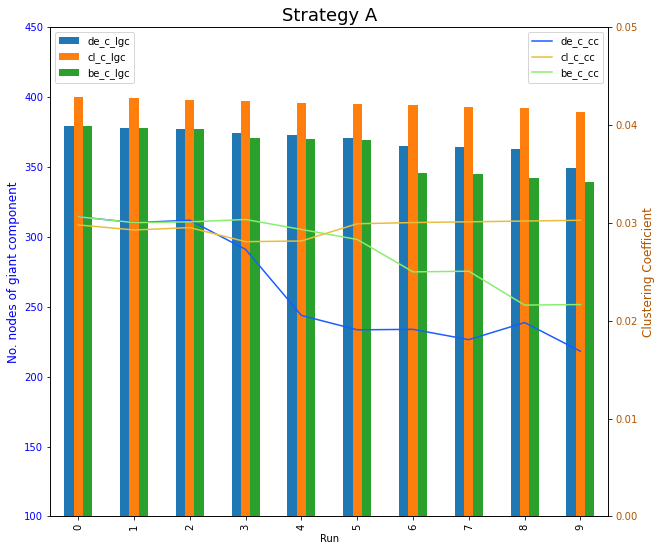

In [297]:
import numpy as np
import matplotlib.pyplot as plt

#fig, ax1 = plt.subplots(figsize=(10,5))  #创建子图

#ax1.grid(True)
ax1 = stra_a[['de_c_lgc','cl_c_lgc','be_c_lgc']].plot(kind='bar',figsize=(10,9))
#l1 = ax1.plot(stra_a[['de_c_lgc','cl_c_lgc','be_c_lgc']], label = 'Temperature')

ax1.set_xlabel('Run')
ax1.set_ylim([100, 450])
ax1.set_ylabel('No. nodes of giant component', color = 'b', fontsize=12)
ax1.tick_params(axis='y', labelcolor = 'b')
ax1.legend(loc='upper left')
ax1.set_title('Strategy A', fontsize=18)

#plt.figure(figsize=(10,10))
#显示压力与时间曲线
ax2 = plt.twinx()
l2 = ax2.plot(stra_a1['de_c_cc'], color='#175dff',
              label = 'Pressure')
l3 = ax2.plot(stra_a1['cl_c_cc'], color='#e8be3c',
              label = 'Pressure')
l4 = ax2.plot(stra_a1['be_c_cc'], color='#89ed6f',
              label = 'Pressure')

ax2.set_ylabel('Clustering Coefficient', color = '#b05500', fontsize=12)
ax2.set_ylim([0, 0.05])
ax2.tick_params(axis = 'y', labelcolor = '#b05500')

#图例
line2, = plt.plot([1], label = 'de_c_cc', color = '#175dff')
line3, = plt.plot([1], label = 'cl_c_cc', color = '#e8be3c')
line4, = plt.plot([1], label = 'be_c_cc', color = '#89ed6f')

plt.legend(handles = [line2, line3, line4], loc = 'upper right')
#plt.show()


plt.savefig('A')

### b) sequential

In [298]:
GB=G.copy()
GB1=G.copy()
GB2=G.copy()

#### degree

In [299]:
# #To remove nodes: 
# #If we want to remove the node with the max value of betweenness centrality:

# maxde = [n for n in GB.nodes() if GB.nodes[n]['degree'] == max(degree_values)]
# maxde

In [300]:
#maxde = ['Stratford']                               # 1
#maxde = ['Bank and Monument']                       # 2
#maxde = ['Baker Street']                            # 3
#maxde = ["King's Cross St. Pancras"]                # 4
#maxde = ["Earl's Court"]                            # 5
#maxde = ['Canning Town']                            # 6
#maxde = ['Oxford Circus']                           # 7
#maxde = ['Green Park']                              # 8
#maxde = ["Willesden Junction"]                      # 9
maxde = ['Turnham Green']                           # 10

In [301]:
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GB.remove_nodes_from(maxde)

In [302]:
# number of nodes after the removal
bl2=list(GB.nodes)
len(bl2)

400

In [303]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(bl2))
rem_nodes

['Turnham Green']

In [304]:
# Has the graph one component?
print(nx.is_connected(GB))

True


In [305]:
# number of connected components
nx.number_connected_components(GB)

1

In [306]:
# To comput the size ( number of node) of each component
Subg = [GB.subgraph(c).copy() for c in nx.connected_components(GB)]
[len(subgraph.nodes) for subgraph in Subg]

[400]

In [307]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GB)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph_GB = GB.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph_GB.number_of_nodes()

400

In [308]:
clus_coe =nx.average_clustering(GB)
SP_GB=nx.average_shortest_path_length(Largest_subgraph_GB)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GB))

cluster coefficent: 0.027291666666666672
shortest path ave: 13.844097744360901


##### Recalculate:

In [309]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(GB)
nx.set_node_attributes(G,dict(deg_london),'degree')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=GB.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(GB, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Oxford Circus,Oxford Circus,0.0150
Canning Town,Canning Town,0.0150
West Ham,West Ham,0.0150


#### Topological Closeness Centrality

In [310]:
#To remove nodes: 
#If we want to remove the node with the max value of Degree:

maxcct=[n for n in GB1.nodes() if GB1.nodes[n]['closeness_t'] == max(clos_t_val)]
maxcct

['Green Park']

In [311]:
#maxcct = ['Green Park']                        #1
#maxcct = ["King's Cross St. Pancras"]          #2
#maxcct = ['Waterloo']                          #3
#maxcct = ['Bank and Monument']                 #4
#maxcct = ['West Hampstead']                    #5
#maxcct = ['Canada Water']                      #6
#maxcct = ['Stratford']                         #7
#maxcct = ["Earl's Court"]                      #8
#maxcct = ["Shepherd's Bush"]                   #9
#maxcct = ['Oxford Circus']                     #10

In [312]:
#maxbet = ['Waterloo']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GB1.remove_nodes_from(maxcct)

In [313]:
# original 401 nodes
# Number of existing nodes:
cc1=list(GB1.nodes)
len(cc1)

400

In [314]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(cc1))
rem_nodes

['Green Park']

In [315]:
print(nx.is_connected(GB1))

True


In [316]:
# number of connected components
nx.number_connected_components(GB1)

1

In [317]:
# To comput the size ( number of node) of each component
Subg = [GB1.subgraph(c).copy() for c in nx.connected_components(GB1)]
[len(subgraph.nodes) for subgraph in Subg]

[400]

In [318]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GB1)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph_GB1 = GB1.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph_GB1.number_of_nodes()

400

In [319]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph_GB1)
diameter 

# original is 36

36

In [320]:
clus_coe =nx.average_clustering(GB1)
SP_GB1=nx.average_shortest_path_length(Largest_subgraph_GB1)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GB1))

cluster coefficent: 0.02979166666666667
shortest path ave: 13.82453634085213


##### recalculate:

In [321]:
#topological closeness centrality
# 和上面的比没有用 distance, 可以用这个 也可以用有distance的，在做作业的时候需要说明为什么选择其中的一个。
clos_t=nx.closeness_centrality(GB1)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GB1,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GB1.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB1, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GB1, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
King's Cross St. Pancras,King's Cross St. Pancras,0.112363
Angel,Angel,0.110221
Farringdon,Farringdon,0.110221
Moorgate,Moorgate,0.109615
Bank and Monument,Bank and Monument,0.109435
Barbican,Barbican,0.108897
Old Street,Old Street,0.108897
Liverpool Street,Liverpool Street,0.107984
Euston,Euston,0.107576
Waterloo,Waterloo,0.107143


#### Topological Betweenness Centrality

In [322]:
#To remove nodes: 
#If we want to remove the node with the max value of Degree:

maxbet=[n for n in GB2.nodes() if GB2.nodes[n]['betweenness_t'] == max(betweenness_t_values)]
maxbet

['Stratford']

In [323]:
#maxbet = ['Stratford']                         #1
#maxbet = ["King's Cross St. Pancras"]          #2
#maxbet = ['Waterloo']                          #3
#maxbet = ['Bank and Monument']                 #4
#maxbet = ['Canada Water']                      #5
#maxbet = ['West Hampstead']                    #6
#maxbet = ["Earl's Court"]                      #7
#maxbet = ["Shepherd's Bush"]                   #8
#maxbet = ['Euston']                            #9
#maxbet = ['Baker Street']                      #10

In [324]:
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GB2.remove_nodes_from(maxbet)

In [325]:
# original 401 nodes
# Number of existing nodes:
bt1=list(GB2.nodes)
len(bt1)

400

In [326]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(bt1))
rem_nodes

['Stratford']

In [327]:
print(nx.is_connected(GB2))

False


In [328]:
# number of connected components
nx.number_connected_components(GB2)

3

In [329]:
# To comput the size ( number of node) of each component
Subg = [GB2.subgraph(c).copy() for c in nx.connected_components(GB2)]
[len(subgraph.nodes) for subgraph in Subg]

[379, 20, 1]

In [330]:

# Get the list of components:
components = nx.connected_components(GB2)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph_GB2 = GB2.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph_GB2.number_of_nodes()

379

In [331]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

# original is 36

45

In [332]:
clus_coe =nx.average_clustering(GB2)
SP_GB2=nx.average_shortest_path_length(Largest_subgraph_GB2)
print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GB2))

cluster coefficent: 0.030625000000000003
shortest path ave: 14.496447069006436


In [333]:
# clus_coe =nx.average_clustering(GB1)
# SP_GB1=nx.average_shortest_path_length(GB2)
# print("cluster coefficent: " + str(clus_coe) + "\n" + "shortest path ave: " + str(SP_GB1))

##### Recalculate:

In [334]:
### Topological betweenness centrality:
## 当不在意distance 在两个站点，就可以ignore distance用topological - 只在意两个node之间有多少个stop。

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(GB2, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GB2,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GB2.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB2, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GB2, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
King's Cross St. Pancras,King's Cross St. Pancras,19632.883550
Bank and Monument,Bank and Monument,16189.930087
Euston,Euston,15681.102778
Highbury & Islington,Highbury & Islington,14784.085931
Baker Street,Baker Street,13681.567136
Waterloo,Waterloo,13292.924892
Green Park,Green Park,12745.906025
Finsbury Park,Finsbury Park,12299.226407
Finchley Road,Finchley Road,12180.319913
Canada Water,Canada Water,12115.210714


In [335]:
# strategy B result
lgc_B = {'de_c_lgcb':[379,378,377,374,373,359,357,356,342,336],
        'cl_c_lgcb':[400,399,398,397,396,226,226,225,195,194],
        'be_c_lgcb':[379,378,377,376,375,227,226,196,173,170]}

cc_B = {'de_c_ccb':[0.030625,0.03002745,0.027051926,0.027287993,0.020538721,0.017637131,0.016159052,0.018320611,0.018367347,0.015174766],
        'cl_c_ccb':[0.029791667,0.030033417,0.028715004,0.028079645,0.028150553,0.02822182,0.028378052,0.021580032,0.021635083,0.023395445],
        'be_c_ccb':[0.030625,0.030868839,0.029971285,0.029255128,0.029329004,0.029403255,0.022625091,0.022682661,0.019339164,0.016283035]}

stra_b = pd.DataFrame.from_dict(lgc_B)
stra_b1 = pd.DataFrame.from_dict(cc_B)
stra_b1

,de_c_ccb,cl_c_ccb,be_c_ccb
0,0.030625,0.029792,0.030625
1,0.030027,0.030033,0.030869
2,0.027052,0.028715,0.029971
3,0.027288,0.028080,0.029255
4,0.020539,0.028151,0.029329
5,0.017637,0.028222,0.029403
6,0.016159,0.028378,0.022625
7,0.018321,0.021580,0.022683
8,0.018367,0.021635,0.019339
9,0.015175,0.023395,0.016283


In [336]:
stra_b

,de_c_lgcb,cl_c_lgcb,be_c_lgcb
0,379,400,379
1,378,399,378
2,377,398,377
3,374,397,376
4,373,396,375
5,359,226,227
6,357,226,226
7,356,225,196
8,342,195,173
9,336,194,170


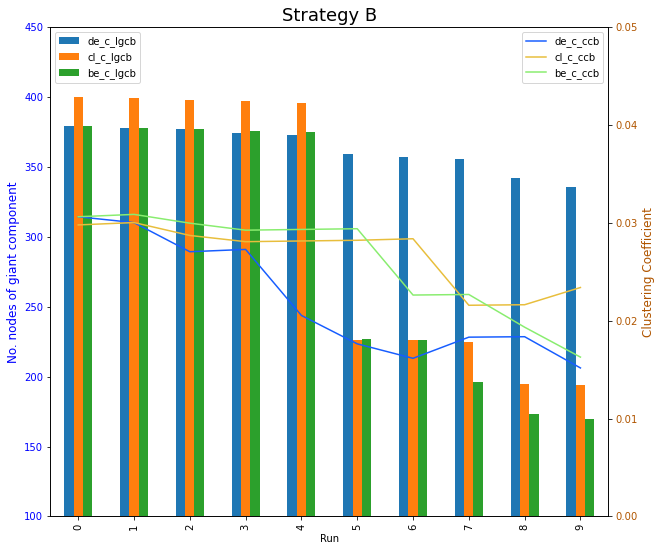

In [417]:
import numpy as np
import matplotlib.pyplot as plt

#fig, ax1 = plt.subplots(figsize=(10,5))  #创建子图

#ax1.grid(True)
ax1 = stra_b[['de_c_lgcb','cl_c_lgcb','be_c_lgcb']].plot(kind='bar',figsize=(10,9))
#l1 = ax1.plot(stra_a[['de_c_lgc','cl_c_lgc','be_c_lgc']], label = 'Temperature')

ax1.set_xlabel('Run')
ax1.set_ylim([100, 450])
ax1.set_ylabel('No. nodes of giant component', color = 'b', fontsize=12)
ax1.tick_params(axis='y', labelcolor = 'b')
ax1.legend(loc='upper left')
ax1.set_title('Strategy B', fontsize=18)

#plt.figure(figsize=(10,10))
#显示压力与时间曲线
ax2 = plt.twinx()
l2 = ax2.plot(stra_b1['de_c_ccb'], color='#175dff',
              label = 'Pressure')
l3 = ax2.plot(stra_b1['cl_c_ccb'], color='#e8be3c',
              label = 'Pressure')
l4 = ax2.plot(stra_b1['be_c_ccb'], color='#89ed6f',
              label = 'Pressure')

ax2.set_ylabel('Clustering Coefficient', color = '#b05500', fontsize=12)
ax2.set_ylim([0, 0.05])
ax2.tick_params(axis = 'y', labelcolor = '#b05500')

#legend
line2, = plt.plot([1], label = 'de_c_ccb', color = '#175dff')
line3, = plt.plot([1], label = 'cl_c_ccb', color = '#e8be3c')
line4, = plt.plot([1], label = 'be_c_ccb', color = '#89ed6f')

plt.legend(handles = [line2, line3, line4], loc = 'upper right')
plt.savefig('B')

# II.1  Consider the centrality measure derived in I.-

In [338]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [339]:
 #We can print the dataframe from the shapefile to check the data
df1 = nx.to_pandas_edgelist(G)
df1

,source,target,length,station_1_,station_2_,flows,line_name
0,Wembley Park,Kingsbury,2916.771558,Wembley Park,Kingsbury,12356,Jubilee
1,Wembley Park,Neasden,2353.165938,Wembley Park,Neasden,6744,Jubilee
2,Wembley Park,Preston Road,1419.735166,Wembley Park,Preston Road,36601,Metropolitan
3,Wembley Park,Finchley Road,7266.373927,Wembley Park,Finchley Road,55216,Metropolitan
4,Kingsbury,Queensbury,1245.995234,Kingsbury,Queensbury,9419,Jubilee
...,...,...,...,...,...,...,...
462,Hounslow Central,Hounslow East,745.684383,Hounslow Central,Hounslow East,13469,Piccadilly
463,Hounslow East,Osterley,967.494672,Hounslow East,Osterley,15935,Piccadilly
464,Osterley,Boston Manor,2560.814291,Osterley,Boston Manor,17445,Piccadilly
465,Boston Manor,Northfields,930.852145,Boston Manor,Northfields,18598,Piccadilly


In [340]:
# for e1, e2, weight in G.edges(data='flows'):
#     if  weight != 0:
#         v_weights = round(1./weight,7)
#         #print(v_weights)
#     else:
#         v_weights = 0

In [341]:
# given that the network is weighted let us introduce the weights.
# Note that we have to invert the weights, since they are meant to represent a distance.
# the higher the value to closer they are

v_weights={(e1, e2):(round(1./weight,7)) if weight!=0 else 0 for e1, e2, weight in G.edges(data='flows')}

# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(G, v_weights, 'v_weights')

# Print edge list with attributes
list(G.edges(data = True))[0:10]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483,
   'line_name': 'Jubilee',
   'flows': 12356,
   'station_1_': 'Wembley Park',
   'station_2_': 'Kingsbury',
   'v_weights': 8.09e-05}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816,
   'line_name': 'Jubilee',
   'flows': 6744,
   'station_1_': 'Wembley Park',
   'station_2_': 'Neasden',
   'v_weights': 0.0001483}),
 ('Wembley Park',
  'Preston Road',
  {'length': 1419.7351657633037,
   'line_name': 'Metropolitan',
   'flows': 36601,
   'station_1_': 'Wembley Park',
   'station_2_': 'Preston Road',
   'v_weights': 2.73e-05}),
 ('Wembley Park',
  'Finchley Road',
  {'length': 7266.37392749648,
   'line_name': 'Metropolitan',
   'flows': 55216,
   'station_1_': 'Wembley Park',
   'station_2_': 'Finchley Road',
   'v_weights': 1.81e-05}),
 ('Kingsbury',
  'Queensbury',
  {'length': 1245.9952343630068,
   'line_name': 'Jubilee',
   'flows': 9419,
   'station_1_': 'Kingsbury',
   'station_2_': 'Queensbury',


In [381]:
bet_london_w=nx.betweenness_centrality(G,weight='v_weights',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w
Green Park,Green Park,44892.50
Bank and Monument,Bank and Monument,39758.50
Waterloo,Waterloo,31904.25
Westminster,Westminster,29664.50
Liverpool Street,Liverpool Street,26530.00
Stratford,Stratford,26125.00
Bond Street,Bond Street,22996.50
Euston,Euston,22314.00
Oxford Circus,Oxford Circus,21207.00
Warren Street,Warren Street,19916.00


In [380]:
bet_london_w_nre=nx.betweenness_centrality(G,weight='flows',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w_nre,'betweenness_w_nre')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w_nre'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w_nre'))

betweenness_w_nre_values=[(i[1]['betweenness_w_nre']) for i in G.nodes(data=True)]

df_sorted = df.sort_values(["betweenness_w_nre"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w_nre
West Hampstead,West Hampstead,28401.50
Gospel Oak,Gospel Oak,21947.00
Finchley Road & Frognal,Finchley Road & Frognal,21446.00
Hampstead Heath,Hampstead Heath,21372.00
Willesden Junction,Willesden Junction,19166.50
Leicester Square,Leicester Square,17097.75
Brondesbury,Brondesbury,16526.00
Brondesbury Park,Brondesbury Park,16411.50
Kensal Rise,Kensal Rise,16299.75
Blackhorse Road,Blackhorse Road,16091.75


In [344]:
ge = nx.global_efficiency(G)
ge

0.1012561935972123

In [345]:
clus_c = nx.average_clustering(G, weight='flows')
clus_c

0.0015791877116043108

In [431]:
# You can compute the diameter of this new graph 
ave_sptor = nx.average_shortest_path_length(G, weight='flows')
ave_sptor

255693.32300498753

# II.3 remove adjust

In [367]:
G23=G.copy()

In [368]:
maxbet=[n for n in G23.nodes() if G23.nodes[n]['betweenness_t'] == max(betweenness_t_values)]
maxbet

['Stratford']

In [369]:
# Number of existing nodes:
l123=list(G23.nodes)
len(l123)

401

In [370]:
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G23.remove_nodes_from(maxbet)

In [371]:
# number of nodes after the removal
l23=list(G23.nodes)
len(l23)

400

In [372]:
# to check which is the one missing:
rem_nodes=list(set(l123) - set(l23))
rem_nodes

['Stratford']

In [424]:
# Has the graph one component?
print(nx.is_connected(G23))

False


In [436]:
# To comput the size ( number of node) of each component
Subg = [G23.subgraph(c).copy() for c in nx.connected_components(G23)]
[len(subgraph.nodes) for subgraph in Subg]

[379, 20, 1]

In [425]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G23)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G23.subgraph(largest_component)

In [540]:
for C in (G23.subgraph(c).copy() for c in nx.connected_components(G23)):
    ave_spt = [nx.average_shortest_path_length(C, weight='flows')]
    print(ave_spt)

[248601.93230584523]
[43132.347368421055]
[0]


In [430]:
# You can compute the diameter of this new graph 
ave_spt = nx.average_shortest_path_length(Largest_subgraph, weight='flows')
ave_spt

248601.93230584523

In [373]:
clus_G23 = nx.average_clustering(G23, weight='flows')
clus_G23

0.0016156156374706456

In [374]:
g_e23 = nx.global_efficiency(G23)
g_e23

0.08891736066510689

## remove the adjust

In [382]:
g23_adj=G.copy()

In [383]:
maxbet_adj=[n for n in g23_adj.nodes() if g23_adj.nodes[n]['betweenness_w'] == max(betweenness_w_values)]
maxbet_adj

['Green Park']

In [384]:
# Number of existing nodes:
l123_adj=list(g23_adj.nodes)
len(l123_adj)

401

In [385]:
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
g23_adj.remove_nodes_from(maxbet_adj)

In [386]:
# number of nodes after the removal
l23_adj=list(g23_adj.nodes)
len(l23_adj)

400

In [432]:
# Has the graph one component?
print(nx.is_connected(g23_adj))

True


In [387]:
# to check which is the one missing:
rem_nodes_adj=list(set(l123_adj) - set(l23_adj))
rem_nodes_adj

['Green Park']

In [388]:
clus_g23_adj = nx.average_clustering(g23_adj, weight='flows')
clus_g23_adj

0.0013181475470089986

In [389]:
g_e23_adj = nx.global_efficiency(g23_adj)
g_e23_adj

0.09918991960788402

In [433]:
# You can compute the diameter of this new graph 
ave_spt_adj = nx.average_shortest_path_length(g23_adj, weight='flows')
ave_spt_adj

257459.25845864663

In [390]:
gxx=G.copy()

In [391]:
maxbet_xx=[n for n in gxx.nodes() if gxx.nodes[n]['betweenness_w_nre'] == max(betweenness_w_nre_values)]
maxbet_xx

['West Hampstead']

In [392]:
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
gxx.remove_nodes_from(maxbet_xx)

In [393]:
clus_xx = nx.average_clustering(gxx, weight='flows')
clus_xx

0.0015831356808833216

In [423]:
g_exx = nx.global_efficiency(gxx)
g_exx

0.10005038744672845

In [512]:
cc = {'original_g':[0.0015791877116043108],
        'no_w_bet':[0.0016156156374706456],
        'w_bet': [0.0013181475470089986],
         'w_bet_nore':[0.0015831356808833216]}

ge = {'original_g_ge':[0.1012561935972123],
        'no_w_bet_ge':[0.08891736066510689],
        'w_bet_ge':[0.09918991960788402],
     'w_bet_nore_ge':[0.10005038744672845]}

cc_all = pd.DataFrame.from_dict(cc)
ge_all = pd.DataFrame.from_dict(ge)

In [513]:
#cc_all.set_index('impact measure', inplace=True)
cc_all

,original_g,no_w_bet,w_bet,w_bet_nore
0,0.001579,0.001616,0.001318,0.001583


In [488]:
ge_all

,original_g_ge,no_w_bet_ge,w_bet_ge,w_bet_nore_ge
0,0.101256,0.088917,0.09919,0.10005


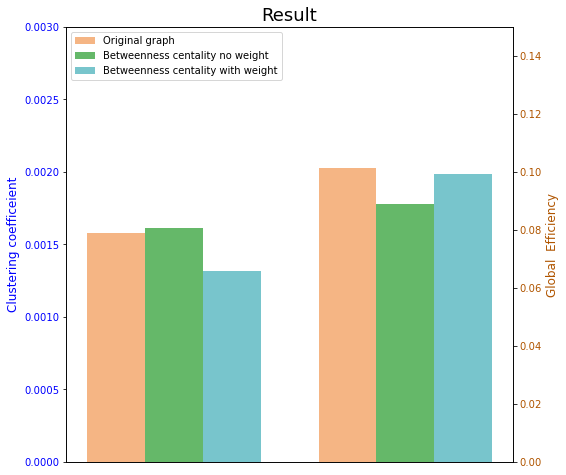

In [539]:
fig, ax1 = plt.subplots(figsize=(8,8))  #创建子图

#ax1.grid(True)
#ax1 = cc_all[['original_g','no_w_bet','w_bet']].plot(kind='bar',figsize=(10,9))
ax1.bar(x_axis - 1, cc_all['original_g'],  color='#f5b584',width=0.2, label='Original graph')
ax1.bar(x_axis - 0.8,cc_all['no_w_bet'],  color='#65b869', width=0.2, label='Betweenness centality no weight')
ax1.bar(x_axis - 0.6, cc_all['w_bet'],  color='#78c5cc', width=0.2, label='Betweenness centality with weight')

#ax1.set_xlabel('')
ax1.set_ylim([0, 0.003])
ax1.set_ylabel('Clustering coefficeient', color = 'b', fontsize=12)
ax1.tick_params(axis='y', labelcolor = 'b')
ax1.legend(loc='upper left')
ax1.set_title('Result', fontsize=18)
ax1.axes.get_xaxis().set_visible(False)

ax2 = ax1.twinx()
index = cc_all.index
x_axis=np.arange(len(index))
ax2.bar(x_axis - 0.2, ge_all['original_g_ge'], color='#f5b584', width=0.2, label='Original graph')
ax2.bar(x_axis, ge_all['no_w_bet_ge'],  color='#65b869', width=0.2,label='Betweenness centality no weight')
ax2.bar(x_axis +0.2, ge_all['w_bet_ge'],  color='#78c5cc', width=0.2,label='Betweenness centality with weight')
#ax2 = ge_all[['original_g_ge','no_w_bet_ge','w_bet_ge']].plot(kind='bar',figsize=(10,9))

ax2.set_ylabel('Global  Efficiency', color = '#b05500', fontsize=12)
ax2.set_ylim([0, 0.15])
ax2.tick_params(axis = 'y', labelcolor = '#b05500')
plt.savefig('Result_23')

plt.show()
